In [1]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
import logging 
from matplotlib.patches import PathPatch
from matplotlib.path import Path
mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.WARNING) 
plt.rcParams['figure.figsize'] = [9.5*2, 6*2]


# XCLIM and xarray
import xclim.indices as xci
import xclim.temperature as temp
import xclim.precip as prec
import numpy as np
import xclim.utils as xut
import xarray as xr
import dask
from distributed import Client

# start client
client=Client(n_workers=4, threads_per_worker=10,diagnostics_port=8787, memory_limit='10GB')
client

  FutureWarning)

DEBUG:asyncio:Using selector: EpollSelector
DEBUG:asyncio:Using selector: EpollSelector
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)



Client Scheduler: tcp://127.0.0.1:45202 Dashboard: http://127.0.0.1:34266/status,Cluster Workers: 4 Cores: 40 Memory: 40.00 GB


In [2]:
inrep = '/pvcs1/DATA/testdata/XCLIM_workshop/'
rcps = ['rcp45','rcp85']
v = 'tx_max'
ncfiles = {}
for r in rcps:
    ncfiles[r] = glob.glob(glob.os.path.join(inrep,r,v,'*.nc'))
print(ncfiles)

{'rcp45': ['/pvcs1/DATA/testdata/XCLIM_workshop/rcp45/tx_max/tx_max_YS_day_ACCESS1-3_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.nc', '/pvcs1/DATA/testdata/XCLIM_workshop/rcp45/tx_max/tx_max_YS_day_BNU-ESM_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.nc', '/pvcs1/DATA/testdata/XCLIM_workshop/rcp45/tx_max/tx_max_YS_day_CMCC-CMS_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.nc', '/pvcs1/DATA/testdata/XCLIM_workshop/rcp45/tx_max/tx_max_YS_day_CanESM2_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.nc', '/pvcs1/DATA/testdata/XCLIM_workshop/rcp45/tx_max/tx_max_YS_day_GFDL-ESM2M_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.nc', '/pvcs1/DATA/testdata/XCLIM_workshop/rcp45/tx_max/tx_max_YS_day_HadGEM2-CC_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.nc', '/pvcs1/DATA/testdata/XCLIM_workshop/rcp45/tx_max/tx_max_YS_day_INM-CM4_rcp45_r1i1p1_na10kgrid_qm-moving-50bins-detrend_1950-2100.nc', '/pvcs1/DATA/testdata/XCLIM_worksho

In [3]:
ens_rcp45 = xut.create_ensemble(ncfiles['rcp45'])

ens_rcp85 = xut.create_ensemble(ncfiles['rcp85'])

finding common time-steps
accessing file  1  of  11
accessing file  2  of  11
accessing file  3  of  11
accessing file  4  of  11
accessing file  5  of  11
accessing file  6  of  11
accessing file  7  of  11
accessing file  8  of  11
accessing file  9  of  11
accessing file  10  of  11
accessing file  11  of  11
concatenating files : adding dimension  realization
finding common time-steps
accessing file  1  of  11
accessing file  2  of  11
accessing file  3  of  11
accessing file  4  of  11
accessing file  5  of  11
accessing file  6  of  11
accessing file  7  of  11
accessing file  8  of  11
accessing file  9  of  11
accessing file  10  of  11
accessing file  11  of  11
concatenating files : adding dimension  realization


In [4]:
print(ens_rcp45,'\n',ens_rcp85)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 324, realization: 11, time: 151)
Coordinates:
  * lat      (lat) float32 59.95691 59.87358 59.79025 ... 45.12417 45.04084
  * lon      (lon) float32 -81.96216 -81.87883 -81.7955 ... -55.1299 -55.04657
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
Dimensions without coordinates: realization
Data variables:
    tx_max   (realization, time, lat, lon) float32 dask.array<shape=(11, 151, 180, 324), chunksize=(1, 10, 180, 324)>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. For internal use only. 
 <xarray.Dataset>
Dimensions:  (lat: 180, lon: 324, realization: 11, time:

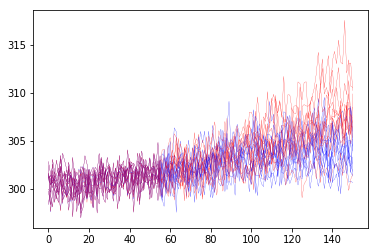

In [5]:
# Plot individual simulations
for i in np.arange(0,ens_rcp45[v].shape[0]):
    plt.plot(ens_rcp45[v][i,].mean(['lon','lat']),color='blue',linewidth=0.2)
    plt.plot(ens_rcp85[v][i,].mean(['lon','lat']),color='red',linewidth=0.2)



In [6]:

ens_stats = xut.ensemble_mean_std_max_min(ens_rcp85)
print(ens_stats.data_vars)

Data variables:
    tx_max_mean   (time, lat, lon) float32 dask.array<shape=(151, 180, 324), chunksize=(10, 180, 324)>
    tx_max_stdev  (time, lat, lon) float32 dask.array<shape=(151, 180, 324), chunksize=(10, 180, 324)>
    tx_max_max    (time, lat, lon) float32 dask.array<shape=(151, 180, 324), chunksize=(10, 180, 324)>
    tx_max_min    (time, lat, lon) float32 dask.array<shape=(151, 180, 324), chunksize=(10, 180, 324)>


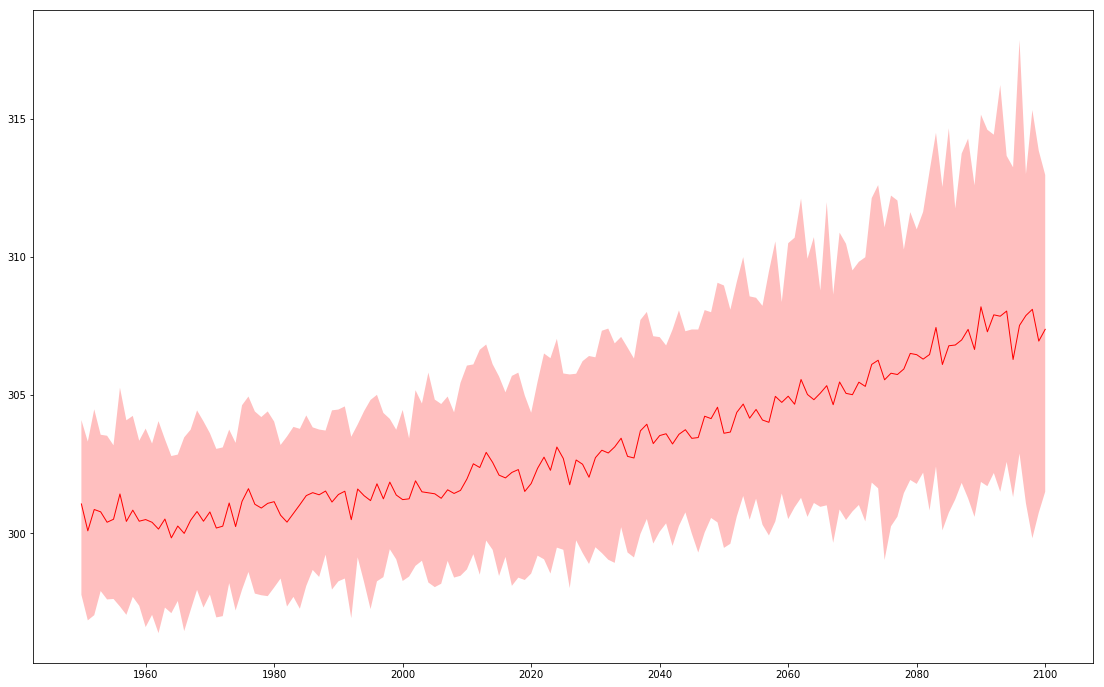

In [7]:
plt.rcParams['figure.figsize'] = [9.5*2, 6*2]
x = ens_stats['tx_max_mean'].time.dt.year
y1 = ens_stats['tx_max_max'].mean(['lon','lat'])
y2 = ens_stats['tx_max_min'].mean(['lon','lat'])
plt.fill_between(x,y1,y2, facecolor='red', alpha=0.25)
plt.plot(x,ens_stats['tx_max_mean'].mean(['lon','lat']), color='red', linewidth = 1)


In [8]:
ens_perc = xut.ensemble_percentiles(ens_rcp85)
print(ens_perc.data_vars)
ens_perc = xut.ensemble_percentiles(ens_rcp85, values=[10,25,50,75,90])
print(ens_perc.data_vars)

loading ensemble data to memory


  interpolation=interpolation)



Data variables:
    tx_max_p10  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    tx_max_p50  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    tx_max_p90  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
loading ensemble data to memory
Data variables:
    tx_max_p10  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    tx_max_p25  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    tx_max_p50  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    tx_max_p75  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    tx_max_p90  (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan


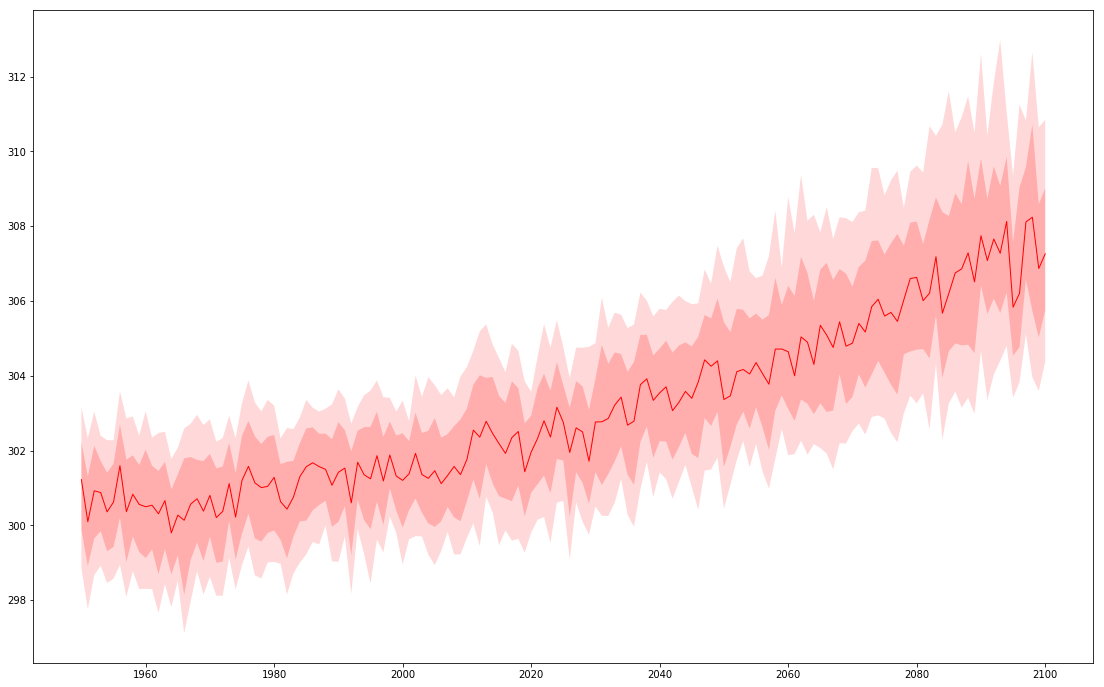

In [9]:
plt.rcParams['figure.figsize'] = [9.5*2, 6*2]
y1 = ens_perc['tx_max_p90'].mean(['lon','lat'])
y2 = ens_perc['tx_max_p10'].mean(['lon','lat'])
plt.fill_between(x,y1,y2, facecolor='red', alpha=0.15)

y1 = ens_perc['tx_max_p75'].mean(['lon','lat'])
y2 = ens_perc['tx_max_p25'].mean(['lon','lat'])
plt.fill_between(x,y1,y2, facecolor='red', alpha=0.2)
plt.plot(x,ens_perc['tx_max_p50'].mean(['lon','lat']), color='red', linewidth = 1)


In [10]:
# 30 year averages
ensSub = xut.subset_bbox(ens_rcp85,start_yr = 1951)
ens30y = ensSub.rolling(time=30,  center=True).mean()

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 324, realization: 11)
Coordinates:
  * lat      (lat) float32 59.95691 59.87358 59.79025 ... 45.12417 45.04084
  * lon      (lon) float32 -81.96216 -81.87883 -81.7955 ... -55.1299 -55.04657
    time     datetime64[ns] 1980-01-01
Dimensions without coordinates: realization
Data variables:
    tx_max   (realization, lat, lon) float32 nan nan nan nan ... nan nan nan nan


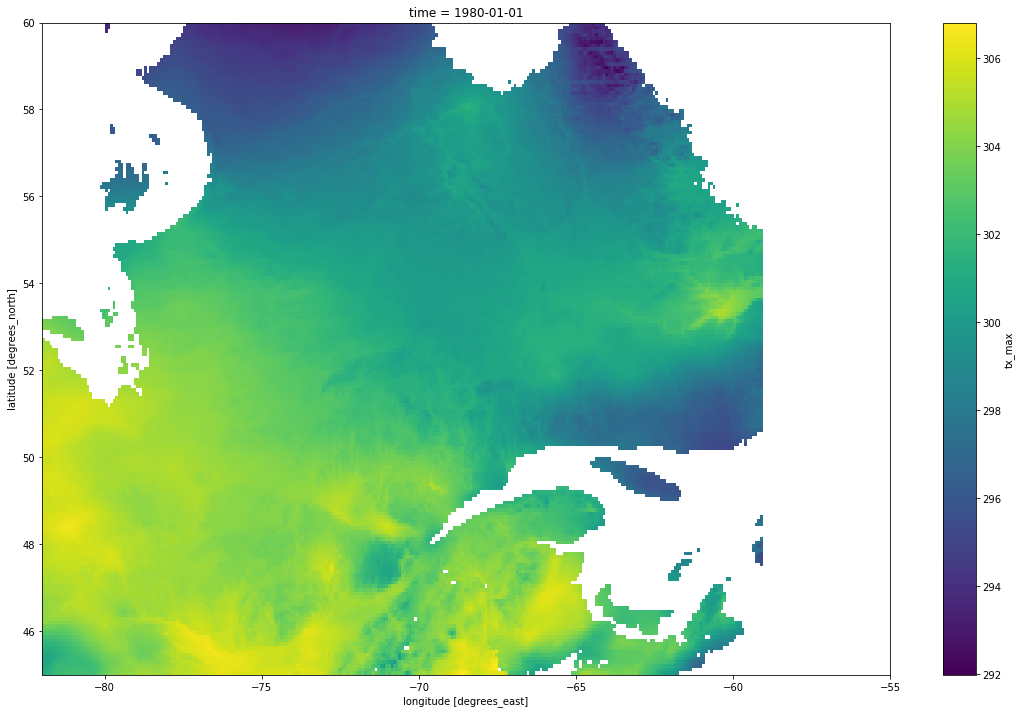

In [11]:
#print(ens30y)
print(ens30y.sel(time='1980-01-01'))
ens30y.sel(time='1980-01-01')['tx_max'][0,:,:].plot.imshow()
#print(ens30y.time)

In [12]:
# Create deltas wrt to 1981-2010
ref_per = ens30y.sel(time='2010-01-01')
print(ref_per.time.values)

2010-01-01T00:00:00.000000000


In [13]:
ensDeltas = ens30y - ref_per
print(ensDeltas)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 324, realization: 11, time: 150)
Coordinates:
  * lat      (lat) float32 59.95691 59.87358 59.79025 ... 45.12417 45.04084
  * lon      (lon) float32 -81.96216 -81.87883 -81.7955 ... -55.1299 -55.04657
  * time     (time) datetime64[ns] 1951-01-01 1952-01-01 ... 2100-01-01
Dimensions without coordinates: realization
Data variables:
    tx_max   (realization, time, lat, lon) float32 nan nan nan ... nan nan nan


In [18]:
ens_percDeltas = xut.ensemble_percentiles(ensDeltas)
print(ens_percDeltas)

loading ensemble data to memory
<xarray.DataArray 'tx_max_p10' ()>
array(-2.846863)


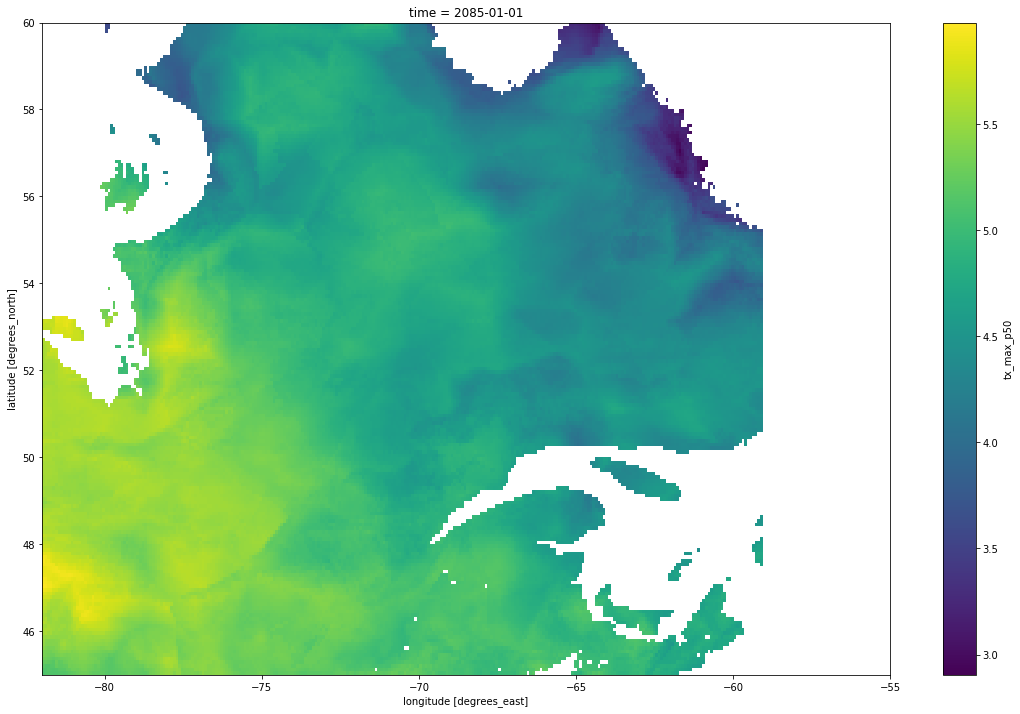

In [25]:
#print(ens_percDeltas.time)
ens_percDeltas['tx_max_p50'].sel(time='2085-01-01').plot.imshow()